In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
!pip install scikit-learn==1.0

     |████████████████████████████████| 23.1 MB 6.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import sklearn
sklearn.__version__

'1.0'

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, train_test_split, GridSearchCV 
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer, recall_score, confusion_matrix, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt

In [5]:
df_fullX = pd.read_csv("mean_FA_47tracts_51subjects.csv",index_col=0)
df_fullX

,496,2236,384,1833,869,3159,1062,3028,2844,388,...,1133,3320,3214,1386,3508,3318,2417,3468,2827,3283
anterioFrontalCC,0.632962,0.568857,0.626708,0.586930,0.647476,0.558272,0.611070,0.613666,0.596724,0.592404,...,0.618450,0.522183,0.572471,0.593135,0.564249,0.558280,0.578814,0.560978,0.575504,0.605542
forcepsMajor,0.737866,0.703005,0.726527,0.649913,0.727517,0.670481,0.731945,0.712419,0.668552,0.745050,...,0.729845,0.706121,0.713530,0.743247,0.682015,0.646550,0.679819,0.640497,0.710944,0.742961
forcepsMinor,0.634883,0.568031,0.614243,0.594077,0.637367,0.525520,0.609092,0.617113,0.612825,0.606365,...,0.586327,0.523520,0.575104,0.559238,0.543411,0.563934,0.565215,0.583736,0.595425,0.611458
leftArc,0.502215,0.477428,0.500105,0.439583,0.510844,0.438035,0.487041,0.525188,0.428255,0.476431,...,0.486667,0.512238,0.434677,0.463121,0.471023,0.433315,0.508143,0.442485,0.405755,0.453436
leftAslant,0.521281,0.476480,0.523383,0.498224,0.507089,0.480618,0.503857,0.510420,0.450239,0.504245,...,0.509887,0.482438,0.496723,0.468858,0.487647,0.458130,0.464183,0.462430,0.441417,0.474729
leftCST,0.619819,0.544799,0.551569,0.513205,0.562571,0.532348,0.553419,0.547949,0.516649,0.535549,...,0.534919,0.564440,0.537515,0.506347,0.534269,0.494520,0.533043,0.511952,0.502608,0.515970
leftIFOF,0.648689,0.550403,0.596144,0.538804,0.586132,0.552703,0.583771,0.580068,0.555473,0.575036,...,0.580563,0.510105,0.537848,0.548568,0.543881,0.509848,0.564490,0.552247,0.528649,0.541580
leftILF,0.621294,0.543618,0.567127,0.517455,0.547759,0.506661,0.553562,0.576472,0.540783,0.548752,...,0.552556,0.503419,0.514416,0.526304,0.515612,0.513831,0.557653,0.533459,0.510328,0.544438
leftMDLFang,0.561366,0.510192,0.477017,0.448813,0.486940,0.471275,0.496898,0.546665,0.485606,0.492897,...,0.514935,0.474190,0.439074,0.431042,0.444833,0.430672,0.484571,0.486118,0.470765,0.503819
leftMDLFspl,0.546876,0.502970,0.487837,0.453242,0.483129,0.507498,0.496891,0.531611,0.479668,0.504560,...,0.524634,0.489771,0.449449,0.470799,0.458693,0.476917,0.505418,0.458222,0.473539,0.497493


In [6]:
#extract X
X = df_fullX.values
X.shape

(47, 51)

In [7]:
#transpose X since it should be (n_samples, n_features)
X = X.T
n_samples, n_features = X.shape
X.shape

(51, 47)

In [8]:
#compute target y
n_samples, n_features = X.shape
early_count = 42
late_count = n_samples - early_count
y = np.concatenate((np.zeros(early_count), np.ones(late_count)))
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
#split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.])

In [10]:
def run_gs_lr(X_train, y_train, class_weight=None):
    """GridSearch CV with LR
    """
    ### Defining parameter grid ###
    C = np.logspace(-4, 2, 7)
    weights = np.arange(1, 10, 0.1)
    tol_list = [1e-04, 1e-03, 1e-02]
    solver_list = ['saga', 'liblinear']
    penalty = ['l1', 'l2']
    scoring = ['roc_auc', 'f1']
    max_iter = 10000

    #LogisticRegression
    if class_weight=='balanced':
        lr = LogisticRegression(max_iter=max_iter, class_weight='balanced')
        param_grid = {'C': C, 'tol': tol_list, 'solver': solver_list, 'penalty': penalty}
    else:
        lr = LogisticRegression(max_iter=max_iter)
        param_grid = {'C': C, 'class_weight': [{0:1, 1:w} for w in weights]}

    gs = GridSearchCV(lr, return_train_score=True, param_grid=param_grid, 
                      scoring=scoring, cv=rskfold, refit='roc_auc', n_jobs=-1)

    gs.fit(X_train, y_train)
    results = gs.cv_results_

    print_gs_results(gs, results)

    return gs, results

In [11]:
def print_gs_results(gs, results):
    """Print GridSearchCV results.
    """
    print('='*20)
    print("best estimator: " + str(gs.best_estimator_))
    print("best params: " + str(gs.best_params_))
    print('best roc_auc score:', gs.best_score_, '(%f)' %results['std_test_roc_auc'][gs.best_index_])
    print('f1:', results['mean_test_f1'][gs.best_index_])
    print('='*20)

In [12]:
n_folds = 5
n_repeats = 10
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=0)

In [13]:
t1=time.time()
print("GridSearchCV with Logistic Regression...")
gs_lr, results_lr = run_gs_lr(X_train, y_train, class_weight='balanced')
print("---> Time spent: %.02f minutes" %((time.time()-t1)/60))

GridSearchCV with Logistic Regression...
best estimator: LogisticRegression(C=10.0, class_weight='balanced', max_iter=10000,
                   penalty='l1', solver='saga')
best params: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
best roc_auc score: 0.8513333333333334 (0.143327)
f1: 0.54
---> Time spent: 0.93 minutes


In [14]:
#test on test set
y_pred=gs_lr.predict(X_test)
y_pred_proba = gs_lr.predict_proba(X_test)[:, 1]
[fpr47, tpr47, thr47] = roc_curve(y_test, y_pred_proba)

print("AUC is %2.3f" % roc_auc_score(y_test, y_pred_proba))
print("Sensitivity is %2.3f" % recall_score(y_test, y_pred))
print("Specificity is %2.4f" % recall_score(np.logical_not(y_test), np.logical_not(y_pred)))
print("Accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("Balanced accuracy is %2.3f" % balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
AUC_all = roc_auc_score(y_test, y_pred_proba)

AUC is 0.857
Sensitivity is 1.000
Specificity is 0.7857
Accuracy is 0.824
Balanced accuracy is 0.893
[[11  3]
 [ 0  3]]


In [15]:
#try with default parameters on X
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)

#test on test set
y_pred=clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print("AUC is %2.3f" % roc_auc_score(y_test, y_pred_proba))
print("Sensitivity is %2.3f" % recall_score(y_test, y_pred))
print("Specificity is %2.3f" % recall_score(np.logical_not(y_test), np.logical_not(y_pred)))
print("Accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("Balanced accuracy is %2.3f" % balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
AUC_all = roc_auc_score(y_test, y_pred_proba)

AUC is 0.857
Sensitivity is 1.000
Specificity is 0.714
Accuracy is 0.765
Balanced accuracy is 0.857
[[10  4]
 [ 0  3]]


In [16]:
#now trying with the 16 significant tracts of Figure 3
significant_tracts = ['leftIFOF',
 'rightMDLFang',
 'anterioFrontalCC',
 'forcepsMinor',
 'rightpArc',
 'rightAslant',
 'lefttemporoThalamic',
 'rightILF',
 'leftILF',
 'leftUncinate',
 'leftMDLFang',
 'rightSLF1And2',
 'leftAslant',
 'rightMDLFspl',
 'leftMDLFspl',
 'rightTPC']

In [17]:
#get indexes
idx_16 = df_fullX.index.isin(significant_tracts)
X_16 = X[:,idx_16]
X_train_16 = X_train[:,idx_16]
X_test_16 = X_test[:,idx_16]
X_16.shape

(51, 16)

In [18]:
#try with default parameters on X_16
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_16, y_train)

#test on test set
y_pred=clf.predict(X_test_16)
y_pred_proba = clf.predict_proba(X_test_16)[:, 1]
[fpr16, tpr16, thr16] = roc_curve(y_test, y_pred_proba, drop_intermediate=False)

print("AUC is %2.4f" % roc_auc_score(y_test, y_pred_proba))
print("Sensitivity is %2.3f" % recall_score(y_test, y_pred))
print("Specificity is %2.3f" % recall_score(np.logical_not(y_test), np.logical_not(y_pred)))
print("Accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("Balanced accuracy is %2.3f" % balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
AUC_all = roc_auc_score(y_test, y_pred_proba)

AUC is 0.9048
Sensitivity is 1.000
Specificity is 0.786
Accuracy is 0.824
Balanced accuracy is 0.893
[[11  3]
 [ 0  3]]


In [19]:
#now trying with the best 2 tracts of Figure 3 
X_2 = df_fullX[df_fullX.index.isin(['leftIFOF', 'rightMDLFang'])].values
X_2 = X_2.T
#split dataset into training and test set
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size=0.33, random_state=0, stratify=y)

In [20]:
#try with default parameters X_2
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_2, y_train)

#test on test set
y_pred=clf.predict(X_test_2)
y_pred_proba = clf.predict_proba(X_test_2)[:, 1]
[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred_proba, drop_intermediate=False)

print("AUC is %2.3f" % roc_auc_score(y_test, y_pred_proba))
print("Sensitivity is %2.3f" % recall_score(y_test, y_pred))
print("Specificity is %2.3f" % recall_score(np.logical_not(y_test), np.logical_not(y_pred)))
print("Accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("Balanced accuracy is %2.3f" % balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
AUC_all = roc_auc_score(y_test, y_pred_proba)

AUC is 0.833
Sensitivity is 1.000
Specificity is 0.786
Accuracy is 0.824
Balanced accuracy is 0.893
[[11  3]
 [ 0  3]]


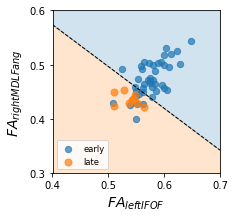

In [21]:
# Visualize the decision boundary and the classification results 
# using 2 tracts on a 2D plot

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

plt.figure(figsize=(3,3))

# Plot the data and the classification with the decision boundary.
xmin, xmax = 0.4, 0.7
ymin, ymax = 0.3, 0.6
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

plt.scatter(*X_2[y==0].T, s=40, alpha=0.7, label='early')
plt.scatter(*X_2[y==1].T, s=50, alpha=0.7, label='late')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.yticks([0.3,0.4,0.5,0.6])
plt.ylabel(r'$FA_{rightMDLFang}$', size=14)
plt.xlabel(r'$FA_{leftIFOF}$', size=14)
plt.legend(fontsize='small', loc=3)
plt.savefig('LR_2d_boundary.png', bbox_inches='tight')

plt.show()

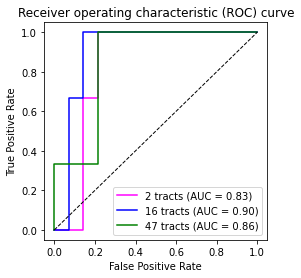

In [24]:
#compare the three classifiers
plt.figure(figsize=(4,4))
plt.plot(fpr2,tpr2,color="magenta", label='2 tracts (AUC = 0.83)')
plt.plot(fpr16,tpr16,color="blue", label='16 tracts (AUC = 0.90)')
plt.plot(fpr47,tpr47,color="green", label='47 tracts (AUC = 0.86)')
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) curve")
plt.legend()
plt.savefig('roc_curves.png', bbox_inches='tight')
plt.show()

In [ ]:
#train on the full X_16 and save the weights
import pickle

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_16, y)
pickle.dump(clf, open('clf_LR_16', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)